In [1]:
!pip install alpha_vantage

In [4]:
%matplotlib notebook

In [103]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import requests
from config import api_key

In [29]:
# Your key here
key = api_key
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

# Get the data, returns a tuple
# Get data for Boeing (BA) stock
df, meta_df = ts.get_daily(symbol='cnk', outputsize = "full")

df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-05-07,13.08,14.1600,12.96,13.61,3506987.0
2020-05-06,13.32,13.4900,12.64,12.79,3009263.0
2020-05-05,14.29,14.5081,13.18,13.24,3884687.0
2020-05-04,12.86,13.7300,12.34,13.70,4179882.0
2020-05-01,13.64,13.8500,12.83,13.52,4912878.0


In [47]:
meta_df

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'nflx',
 '3. Last Refreshed': '2020-05-07',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [ ]:
https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=BA&apikey=demo

In [167]:
# Get data for Boeing (BA) stock
ticker = "nflx"
df, meta_df = ts.get_daily(symbol=str(ticker), outputsize = "full")

# Data cleaning
#Narrow the data to only get stock prices starting on this date
start_date = "2019-06-01"
stock=df[df.index >= start_date]

#Get the stock price on the first day of our range
stock = stock[["4. close"]]
start = stock["4. close"][-1]

# Calculate the %change between the stock price on first day and stock price of each day after
# Add %change data as a column called "change" in our dataframe
stock["change"] = stock.apply(lambda x:(x-start)/start)

In [168]:
# Get the company name given the ticker symbol
co = requests.get(f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={ticker}&apikey={key}").json()
co_name = co["bestMatches"][0]["2. name"]

<IPython.core.display.Javascript object>


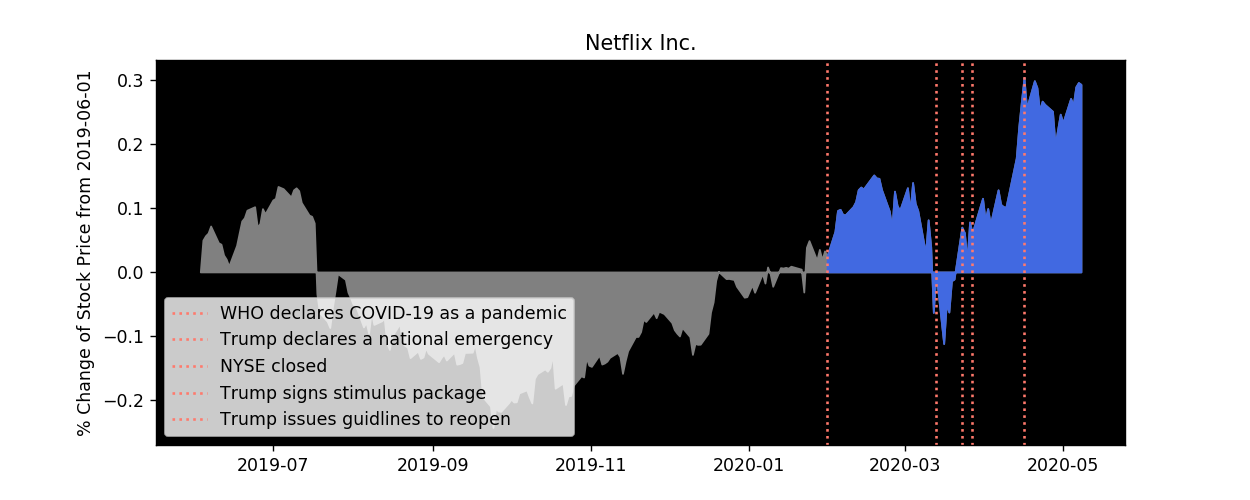

Text(0, 0.5, '% Change of Stock Price from 2019-06-01')

In [177]:
stock_jan=stock[stock.index>='2020-01-31']
stock_neg=stock_jan[stock_jan.change<0]
stock_pos=stock_jan[stock_jan.change>0]

# Visualization
fig, ax=plt.subplots(figsize=(10,4))
ax.fill_between(stock.index,stock.change, color='grey')
ax.fill_between(stock_jan.index,stock_jan.change, color='royalblue')
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor('black')

ax.axvline(pd.to_datetime('2020-01-31'), color='xkcd:salmon', linestyle=':', label = 'WHO declares COVID-19 as a pandemic')
ax.axvline(pd.to_datetime('2020-03-13'), color='xkcd:salmon', linestyle=':', label = 'Trump declares a national emergency')
ax.axvline(pd.to_datetime('2020-03-23'), color='xkcd:salmon', linestyle=':', label = 'NYSE closed')
ax.axvline(pd.to_datetime('2020-03-27'), color='xkcd:salmon', linestyle=':', label = 'Trump signs stimulus package')
ax.axvline(pd.to_datetime('2020-04-16'), color='xkcd:salmon', linestyle=':', label = 'Trump issues guidlines to reopen')
ax.set_title(co_name)
ax.legend(loc='lower left')
ax.set_ylabel(f"% Change of Stock Price from {start_date}")

In [171]:
stock_jan['change']<0

date
2020-05-08    False
2020-05-07    False
2020-05-06    False
2020-05-05    False
2020-05-04    False
              ...  
2020-02-06    False
2020-02-05    False
2020-02-04    False
2020-02-03    False
2020-01-31    False
Name: change, Length: 69, dtype: bool

In [175]:
stock_neg=stock_jan[stock_jan.change<0]
stock_neg
stock_pos=stock_jan[stock_jan.change>0]
stock_pos

,4. close,change
date,,
2020-05-08,435.55,0.293854
2020-05-07,436.53,0.296765
2020-05-06,434.26,0.290022
2020-05-05,424.68,0.261563
2020-05-04,428.15,0.271871
...,...,...
2020-02-06,366.95,0.090069
2020-02-05,369.67,0.098149
2020-02-04,369.01,0.096189
